<a href="https://colab.research.google.com/github/IanThairu/IanThairu/blob/main/Derivative_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as ss
from scipy.integrate import quad
from numpy.fft import fft

## Pricing a European Call Option Using Binomial Tree

In [ ]:
def binomial_call(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probabilities (probs)
    C = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
    return C[0, 0], C, S

In [ ]:
call_price, C, S = binomial_call(100, 90, 10, 0, 1.2, 0.8, 10)
print("Underlying Price Evolution:\n", S)
print("Call Option Payoff:\n", C)
print("Call Option Price at t=0: ", "{:.2f}".format(call_price))

Underlying Price Evolution:
 [[100.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 80.         120.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 64.          96.         144.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 51.2         76.8        115.2        172.8          0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 40.96        61.44        92.16       138.24       207.36
    0.           0.           0.           0.           0.
    0.        ]
 [ 32.768       49.152       73.728      110.592      165.888
  248.832        0.           0.           0.           0.
    0.        ]
 [ 26.2144      39.3216      58.9824      88.4736     132.7104
  199.0656     298.5984       0.           0.           0.
    0.        ]
 [ 20.97152     31.45728

## Pricing a European Put Option Using Binomial Tree

In [ ]:
def binomial_put(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probs
    P = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        P[N, i] = max(K - (S_ini * (u ** (i)) * (d ** (N - i))), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
    return P[0, 0], P, S

In [ ]:
put_price, P, S = binomial_put(36, 36, 50, 0.01, 1.1, 0.7, 50)
print("Underlying Price Evolution:\n", S)
print("Put Option Payoff:\n", P)
print("Price at t=0 for Put option is$", "{:.2f}".format(put_price))

Underlying Price Evolution:
 [[3.60000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.52000000e+01 3.96000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76400000e+01 2.77200000e+01 4.35600000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.32132126e-06 2.07636197e-06 3.26285453e-06 ... 3.49262042e+03
  0.00000000e+00 0.00000000e+00]
 [9.24924879e-07 1.45345338e-06 2.28399817e-06 ... 2.44483429e+03
  3.84188246e+03 0.00000000e+00]
 [6.47447415e-07 1.01741737e-06 1.59879872e-06 ... 1.71138400e+03
  2.68931772e+03 4.22607070e+03]]
Put Option Payoff:
 [[ 7.5822903   0.          0.         ...  0.          0.
   0.        ]
 [ 9.54336876  7.11166527  0.         ...  0.          0.
   0.        ]
 [11.63290642  9.06090302  6.63837335 ...  0.          0.
   0.        ]
 ...
 [35.28715092 35.28715016 35.28714898 ...  0.          0.
   0.        ]
 [35.64179309 35.64179256 35.64179173 ...  0.         

## Put-Call Parity in the Binomial Tree

We already know that in order to satisfy absence of arbitrage conditions, the relationship between the price of the put and the call options must be:

$C_0 + Ke^{-rT} = S_0 + P_0$

In [ ]:
put_price, P, S = binomial_put(100, 90, 10, 0, 1.2, 0.8, 10)
print("Price at t=0 for Put option is $", "{:.2f}".format(put_price))
call_price, C, S = binomial_call(100, 90, 10, 0, 1.2, 0.8, 10)
print("Price at t=0 for Call option is $", "{:.2f}".format(call_price))

Price at t=0 for Put option is $ 19.38
Price at t=0 for Call option is $ 29.38


In [ ]:
round(call_price + 90 * np.exp(-0 * 1), 2) == round(S[0, 0] + put_price, 2)

True

## Pricing an American Call Option Using Binomial Tree

In [ ]:
def american_call_option(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            intrinsic = S_ini * (u ** i) * (d ** (j - i)) - K
            exercise = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            C[j, i] = max(intrinsic, exercise)
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])
    return C[0, 0], C, S, Delta


In [ ]:
american_call_price, C, S, delta = american_call_option(100, 90, 1, 0.05, 0.2, 100)
print("The price of the ATM American call option is:", round(american_call_price, 2))

The price of the ATM American call option is: 16.71


## Pricing an American Put Option Using Binomial Tree

In [ ]:
def american_put_option(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probs
    C = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            intrinsic = K - S_ini * (u ** i) * (d ** (j - i))
            exercise = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            C[j, i] = max(intrinsic, exercise)
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])
    return C[0, 0], C, S, Delta

In [ ]:
american_put_price, P, S, delta = american_put_option(100, 90, 1, 0.05, 0.2, 100)
print("The price of the ATM American put option is:", round(american_put_price, 2))

The price of the ATM American put option is: 2.48


## Pricing a European Call Option Using Trinomial Tree

In [ ]:
class TrinomialModel(object):
    def __init__(self, S0, r, sigma, mat):
        self._s0 = S0
        self._r = r
        self._sigma = sigma
        self._T = mat

    def _compute_probs(self):
        self._pu = (
            (
                np.exp(self._r * self._h / 2)
                - np.exp(-self._sigma * np.sqrt(self._h / 2))
            )
            / (
                np.exp(self._sigma * np.sqrt(self._h / 2))
                - np.exp(-self._sigma * np.sqrt(self._h / 2))
            )
        ) ** 2
        self._pd = (
            (
                -np.exp(self._r * self._h / 2)
                + np.exp(self._sigma * np.sqrt(self._h / 2))
            )
            / (
                np.exp(self._sigma * np.sqrt(self._h / 2))
                - np.exp(-self._sigma * np.sqrt(self._h / 2))
            )
        ) ** 2
        self._pm = 1 - self._pu - self._pd

        assert 0 <= self._pu <= 1.0, "p_u should lie in [0, 1] given %s" % self._pu
        assert 0 <= self._pd <= 1.0, "p_d should lie in [0, 1] given %s" % self._pd
        assert 0 <= self._pm <= 1.0, "p_m should lie in [0, 1] given %s" % self._pm

    def _check_up_value(self, up):
        if up is None:
            up = np.exp(self._sigma * np.sqrt(2 * self._h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self._up = up
        self._down = down

    def _gen_stock_vec(self, nb):
        vec_u = self._up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self._down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self._s0

        return res

    def payoff(self, stock_vec):
        raise NotImplementedError()

    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self._pd
            tmp += nxt_vec_prices[i + 1] * self._pm
            tmp += nxt_vec_prices[i + 2] * self._pu

            expectation[i] = tmp

        return self._discount * expectation

    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self._h = self._T / nb_steps
        self._check_up_value(up)
        self._compute_probs()

        self._discount = np.exp(-self._r * self._h)

        final_vec_stock = self._gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self._gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]


In [ ]:
class TrinomialEuropeanCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialEuropeanCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

In [ ]:
european_call_option = TrinomialEuropeanCall(100, 0.05, 0.20, 2, 90)
call_price = round(european_call_option.price(100), 2)
call_price

22.04

## Pricing a European Put Option Using Trinomial Tree

In [ ]:
class TrinomialEuropeanPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialEuropeanPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

In [ ]:
european_put_option = TrinomialEuropeanPut(100, 0.05, 0.20, 2, 90)
put_price = round(european_put_option.price(100), 2)
put_price

3.48

## Pricing an American Call Option Using Trinomial Tree

In [ ]:
class TrinomialAmericanCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super().__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self._pd
            tmp += nxt_vec_prices[i + 1] * self._pm
            tmp += nxt_vec_prices[i + 2] * self._pu

            intrinsic_value = np.maximum(crt_vec_stock[i] - self.__K, 0.0)
            expectation[i] = np.maximum(tmp, intrinsic_value)

        return self._discount * expectation

In [ ]:
american_call_option = TrinomialAmericanCall(100, 0.05, 0.20, 2, 90)
call_price = round(american_call_option.price(100), 2)
call_price

22.04

## Pricing an American Put Option Using Trinomial Tree

In [ ]:
class TrinomialAmericanPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super().__init__(S0, r, sigma, mat)
        self._K = K

    def payoff(self, s):
        return np.maximum(self._K - s, 0.0)

    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self._pd
            tmp += nxt_vec_prices[i + 1] * self._pm
            tmp += nxt_vec_prices[i + 2] * self._pu

            intrinsic_value = np.maximum(self._K - crt_vec_stock[i], 0.0)
            expectation[i] = np.maximum(tmp, intrinsic_value)

        return self._discount * expectation


In [ ]:
american_put_option = TrinomialAmericanPut(100, 0.05, 0.20, 2, 90)
put_price = round(american_put_option.price(100), 2)

## Pricing Using Black-Scholes closed-form solution

In [ ]:
class BlackScholesModel(object):

    # Initialize the Black Scholes Model algorithm
    def __init__(self, So, K, r, vol, T,option_type):
        self.__So = So
        self.__K = K
        self.__r = r
        self.__vol = vol
        self.__T = T
        self.__option_type = option_type

        assert self.__option_type in ["C", "P"], "Option type should be P for a put option or C for a call option."

    # Compute d1 and d2
        self.d1= (np.log(self.__So / self.__K) + (self.__r + 0.5 * self.__vol**2) * self.__T) / (self.__vol * np.sqrt(self.__T))
        self.d2 = self.d1 - self.__vol * np.sqrt(self.__T)

    # Option pricing
    def price(self):
        if self.__option_type == "C":
          Opt_Price = self.__So * ss.norm.cdf(self.d1) - self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(self.d2)
        else:
          Opt_Price = self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(-self.d2) - self.__So * ss.norm.cdf(-self.d1)
        return Opt_Price

    #Computing the Greeks
    def delta(self):
        if self.__option_type == "C":
         Delta = ss.norm.cdf(self.d1)
        else:
          Delta = -ss.norm.cdf(-self.d1)
        return Delta

    def gamma(self):
        Gamma = ss.norm.pdf(self.d1) / (self.__So * self.__vol * np.sqrt(self.__T))
        return Gamma

    def vega(self):
        Vega = self.__So * ss.norm.pdf(self.d1) * np.sqrt(self.__T)
        return Vega

    def theta(self):
        if self.__option_type == "C":
          Theta = -(self.__So * ss.norm.pdf(self.d1) * self.__vol) / (2 * np.sqrt(self.__T))
          - self.__r * self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(self.d2)
        else:
          Theta = -(self.__So * ss.norm.pdf(self.d1) * self.__vol) / (2 * np.sqrt(self.__T))
          + self.__r * self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(-self.d2)
        return Theta

    def rho(self):
        if self.__option_type == "C":
          Rho = self.__K  * self.__T * np.exp(-self.__r * self.__T) * ss.norm.cdf(self.d2)
        else:
          Rho = -self.__K  * self.__T * np.exp(-self.__r * self.__T) * ss.norm.cdf(-self.d2)
        return Rho

In [ ]:
T = 0.25
S = 100.0
K = S
r = 0.05
vol = 0.20

European_call = BlackScholesModel(S, K, r, vol, T, "C")
European_put = BlackScholesModel(S, K, r, vol, T, "P")

Call_price = European_call.price()
Put_price =  European_put.price()

print("The price of the European Call option is: ", round(Call_price,2))
print("The price of the European Put option is: ", round(Put_price,2))

The price of the European Call option is:  4.61
The price of the European Put option is:  3.37


In [ ]:
#Black Scholes Put-Call parity check
round(Call_price + K * np.exp(-r * T), 2) == round(S + Put_price, 2)

True

## Pricing Using Monte-Carlo Simulations

In [ ]:
def monte_carlo_option_price(S, K, T, r, sigma, num_simulations):
    """
    Calculate the price of an ATM European call and put option using Monte Carlo simulation.

    Arguments:
    S -- Current stock price
    K -- Strike price
    T -- Time to expiration
    r -- Risk-free interest rate
    sigma -- Volatility of the underlying stock
    num_simulations -- Number of Monte Carlo simulations

    Returns:
    call_price -- Price of the European call option
    put_price -- Price of the European put option
    """
    np.random.seed(0)
    z = np.random.standard_normal(num_simulations)
    stock_price = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)

    call_payoff = np.maximum(stock_price - K, 0)
    put_payoff = np.maximum(K - stock_price, 0)

    call_price = np.mean(call_payoff) * np.exp(-r * T)
    put_price = np.mean(put_payoff) * np.exp(-r * T)

    return call_price, put_price

In [ ]:
# Parameters
S = 100  # Current stock price
K = 100  # Strike price
T = 3 / 12  # Time to expiration in years (3 months)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

# Monte Carlo simulation
num_simulations = 100000  # Number of Monte Carlo simulations
call_mc_price, put_mc_price = monte_carlo_option_price(S, K, T, r, sigma, num_simulations)

print("European Call Price:", call_mc_price)
print("European Put Price:", put_mc_price)

European Call Price: 4.6063219686473795
European Put Price: 3.351118103206373


## **Weaknesses of the Black-Scholes Model**


1.   **Assumptions of Constant Volatility**: The Black-Scholes model assumes that the volatility of the underlying asset's price is constant over the option's lifespan. However, in reality, volatility can change over time, which can lead to inaccuracies in pricing options. This assumption is particularly limiting during periods of market instability or when options are being priced over longer time horizons.
2.   **No Consideration of Jump Diffusion or Extreme Events**: The Black-Scholes model assumes that the price movements of the underlying asset follow a continuous geometric Brownian motion, which implies that price changes are continuous and smooth. However, financial markets often experience sudden and discontinuous price movements due to events such as economic announcements, geopolitical events, or market shocks. The model's failure to account for these jumps or extreme events can lead to inaccuracies in option pricing.

etc



# Stochastic Volatility Models

## Heston Model

$$
\begin{equation*}
    S_t = S_{t-1} e^{\left( r - \frac{\nu_t}{2} \right) dt + \sigma \sqrt{\nu_t} dZ_1}
\end{equation*}
$$
$$
\begin{equation*}
    \nu_t = \nu_{t-1} + \kappa \left( \theta - \nu_{t-1} \right) dt + \sigma \sqrt{\nu_{t-1}}dZ_2
\end{equation*}
$$


## Option Pricing under Heston Using Monte-Carlo Methods

In [ ]:
# Stochastic Volatility Function

def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + kappa * (theta - v[t - 1]) * dt
            + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v

#underlying stock price path based on stochastic vol

def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)

    return S

# Generate random numbers following a standard normal
def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand

v0 = 0.04
kappa_v = 2
sigma_v = 0.3
theta_v = 0.04
rho = -0.9

S0 = 100  # Current underlying asset price
r = 0.05  # Risk-free rate
M0 = 50  # Number of time steps in a year
T = 1  # Number of years
M = int(M0 * T)  # Total time steps
Ite = 10000  # Number of simulations
dt = T / M  # Length of time step

# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

def heston_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

print("European Call Price under Heston: ", heston_call_mc(S, 90, 0.05, 1, 0))

European Call Price under Heston:  7.582318502114061


## Jump Diffusion Models

## Pricing Under Merton Model

We will start by implementing the Merton model in Python. As you already know, the model has the following SDE:

$$
\begin{equation*}
    dS_t = \left( r - r_j \right) S_t dt + \sigma S_t dZ_t + J_t S_t dN_t
\end{equation*}
$$

with the following discretized form:

$$
\begin{equation*}
    S_t = S_{t-1} \left( e^{\left(r-r_j-\frac{\sigma^2}{2}\right)dt + \sigma \sqrt{dt} z_t^1}+
    \left(e^{\mu_j+\delta z_t^2}-1 \right) y_t \right)
\end{equation*}
$$

where $z_t^1$ and $z_t^2$ follow a standard normal and $y_t$ follows a Poisson process. Finally, $r_j$ equals to:

$$
\begin{equation*}
r_j = \lambda \left(e^{\mu_j+\frac{\delta^2}{2}}\right)-1
\end{equation*}
$$

In [ ]:
lamb = 0.75  # Lambda of the model
mu = -0.6  # Mu
delta = 0.25  # Delta

In [ ]:
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0  # Maturity/time period (in years)
S0 = 100  # Current Stock Price

Ite = 10000  # Number of simulations (paths)
M = 50  # Number of steps
dt = T / M  # Time-step

In [ ]:
SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

In [ ]:
for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

In [ ]:
def merton_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

print("European Call Price under Merton: ", merton_call_mc(SM, 90, r, T, 0))

European Call Price under Merton:  27.286867749571503


# Option Pricing Using Fourier Methods

## Fourier-Based Pricing for Black-Scholes in Lewis

Black-Scholes Characteristic Function

$$
\begin{equation*}
  \varphi^{BS} (u, T) = e^{((r-\frac{\sigma^2}{2})iu - \frac{\sigma^2}{2}u^2)T}
\end{equation*}
$$

In [ ]:
def BS_characteristic_func(v, x0, T, r, sigma):
    """Computes general Black-Scholes model characteristic function
    to be used in Fourier pricing methods like Lewis (2001) and Carr-Madan (1999)
    """

    cf_value = np.exp(
        ((x0 / T + r - 0.5 * sigma**2) * 1j * v - 0.5 * sigma**2 * v**2) * T
    )

    return cf_value

Integral Value in Lewis

$$
\begin{equation*}
    C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
\end{equation*}
$$

In [ ]:
def BS_integral(u, S0, K, T, r, sigma):
    """Expression for the integral in Lewis (2001)"""

    cf_value = BS_characteristic_func(u - 1j * 0.5, 0.0, T, r, sigma)

    int_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * (np.log(S0 / K))) * cf_value).real
    )

    return int_value

In [ ]:
def BS_call_Lewis(S0, K, T, r, sigma):
    """European Call option price in BS under Lewis (2001)"""

    int_value = quad(lambda u: BS_integral(u, S0, K, T, r, sigma), 0, 100)[0]

    call_value = max(0, S0 - np.exp(-r * T) * (np.sqrt(S0 * K)) / np.pi * int_value)

    return call_value

In [ ]:
print(
    " Fourier Call Option price under Lewis (2001) is $",
    BS_call_Lewis(S0, K, T, r, sigma).round(4),
)

 Fourier Call Option price under Lewis (2001) is $ 10.4506


## Fast Fourier Transform (FFT) for Option Pricing under Black-Scholes

In [ ]:
def BS_call_FFT(S0, K, T, r, sigma):
    """European Call option price in BS under FFT"""

    k = np.log(K / S0)
    x0 = np.log(S0 / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            BS_characteristic_func(v, x0, T, r, sigma)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - BS_characteristic_func(v, x0, T, r, sigma)
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - BS_characteristic_func(v, x0, T, r, sigma)
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue

In [ ]:
print(
    " Fourier Call Option price via FFT is $", BS_call_FFT(S0, K, T, r, sigma).round(4)
)

 Fourier Call Option price via FFT is $ 10.4506


## Fourier-Based Pricing for Heston (1993) Model

### Heston (1993) Characteristic Function

The characteristic function of the Heston (1993) model is given by:

$$
\
\begin{equation*}
  \varphi^{H} (u, T) = e^{H_1(u, T)+H_2(u,T)\nu_0}
\end{equation*}
$$
\
where

$$
\
\begin{equation*}
  H_1 (u, T) \equiv r_0 uiT + \frac{c_1}{\sigma_\nu^2}\Biggl\{ (\kappa_\nu - \rho \sigma_\nu ui+c_2) T - 2 log \left[ \frac{1-c_3e^{c_2T}}{1-c_3} \right] \Biggl\}
\end{equation*}
$$
$$
\
\begin{equation*}
  H_2 (u, T) \equiv \frac{\kappa_\nu - \rho \sigma_\nu ui + c_2}{\sigma_\nu^2} \left[ \frac{1-e^{c_2T}}{1-c_3e^{c_2T}} \right]
\end{equation*}
$$
$$
\
\begin{equation*}
  c_1 \equiv \kappa_\nu \theta_\nu
\end{equation*}
$$
$$
\
\begin{equation*}
  c_2 \equiv - \sqrt{(\rho \sigma_\nu ui - \kappa_\nu)^2 - \sigma_\nu^2(-ui-u^2) }
\end{equation*}
$$
$$
\
\begin{equation*}
  c_3 \equiv \frac{\kappa_\nu - \rho \sigma_\nu ui + c_2}{\kappa_\nu - \rho \sigma_\nu ui - c_2}
\end{equation*}
$$


In [ ]:
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

 Integral Value in Lewis (2001)


 $$
\
\begin{equation*}
    C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
\end{equation*}
$$


In [ ]:
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Fourier-based approach for Lewis (2001): Integration function.
    """
    char_func_value = H93_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [ ]:
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)

    Parameter definition:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    Returns
    =======
    call_value: float
        present value of European call option
    """
    int_value = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [ ]:
# Option Parameters
S0 = 100.0
K = 100.0
T = 1.0
r = 0.02

# Heston(1993) Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

print(
    "Heston (1993) Call Option Value:   $%10.4f "
    % H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
)

Heston (1993) Call Option Value:   $    5.7578 


## Fourier-Based Pricing for Merton (1976)

In [ ]:
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

In [ ]:
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value

In [ ]:
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

In [ ]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.4
lamb = 1
mu = -0.2
delta = 0.1

print(
    "Value of the Call option under Merton (1976) is:  $",
    M76_call_value(S0, K, T, r, sigma, lamb, mu, delta),
)

Value of the Call option under Merton (1976) is:  $ 19.947853881446505


## Pricing via Lewis (2001) with Bates (1996)

Heston (1993) Characteristic Function

In [ ]:
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

Merton (1976) Adjusted Characteristic Function (Only Jump Component)

In [ ]:
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

Bates (1996) Characteristic Function

In [ ]:
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

Call and Integral Value in Bates (1996)

In [ ]:
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

In [ ]:
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [ ]:
# General Parameters
S0 = 100
K = 100
T = 1
r = 0.05

# Heston'93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

# Merton'76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)

print(
    "B96 Call option price via Lewis(2001): $%10.4f"
    % B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via Lewis(2001): $    8.9047


## Call option price in Bates (1996) under FFT

In [ ]:
def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue

In [ ]:
print(
    "B96 Call option price via FFT: $%10.4f"
    % B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
)

B96 Call option price via FFT: $    8.9047


# Working With Real Options Data

## Implied Volatility and Volatility Smile

In [ ]:
!pip install yahoo_fin

In [ ]:
from datetime import date

import yahoo_fin.stock_info as si
from yahoo_fin import options

In [ ]:
Mat = date(2023, 9, 15)  # Fill in the maturity you want to consider here!
T = Mat - date.today()
ticker = "IBM"

chain = options.get_options_chain(ticker, Mat)
options_mats = options.get_expiration_dates(ticker)

price = si.get_live_price(ticker)
print(price)

callData = chain["calls"]
putData = chain["puts"]

callData.head(15)

133.78500366210938


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,IBM230915C00065000,2023-05-08 3:41PM EDT,65.0,58.50,69.35,70.40,0.00,-,2,0,109.86%
1,IBM230915C00080000,2023-05-08 3:47PM EDT,80.0,43.50,54.75,55.55,0.00,-,3,0,86.84%
2,IBM230915C00085000,2023-05-08 1:21PM EDT,85.0,37.75,49.40,50.65,0.00,-,15,0,76.51%
3,IBM230915C00090000,2023-06-30 10:17AM EDT,90.0,44.70,44.05,44.25,0.00,-,4,1,52.73%
4,IBM230915C00095000,2023-05-04 3:15PM EDT,95.0,27.35,36.90,39.35,0.00,-,6,19,50.81%
5,IBM230915C00100000,2023-06-02 11:42AM EDT,100.0,33.77,34.00,34.75,0.00,-,1,194,50.42%
6,IBM230915C00105000,2023-06-01 12:13PM EDT,105.0,26.05,28.95,29.90,0.00,-,8,110,45.44%
7,IBM230915C00110000,2023-07-07 3:44PM EDT,110.0,22.86,24.20,24.40,0.00,-,2,124,33.03%
8,IBM230915C00115000,2023-07-12 9:44AM EDT,115.0,20.44,19.30,19.55,0.00,-,1,229,28.74%
9,IBM230915C00120000,2023-07-13 2:42PM EDT,120.0,14.75,14.55,14.75,1.25,+9.26%,4,261,24.30%


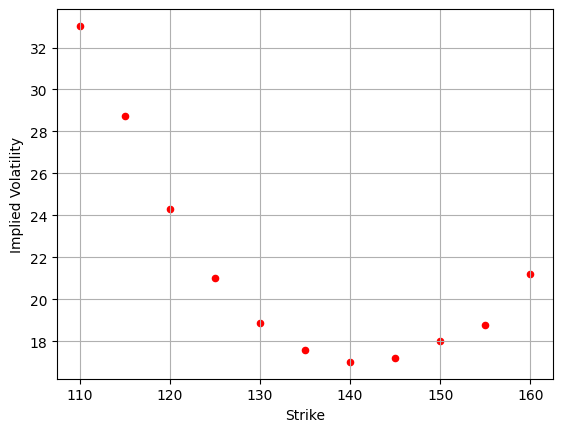

In [ ]:
import matplotlib.pyplot as plt

df_call = callData
df_call["Implied Volatility"] = df_call["Implied Volatility"].str[:-1]
df_call["Implied Volatility"] = df_call["Implied Volatility"].astype(float)
df_call = df_call[df_call["Implied Volatility"] > 0]
df_call["Strike"] = df_call["Strike"].astype(float)
df_call = df_call[
    df_call["Strike"] > price * 0.8
]  # We will only consider those options within a certain range of the current price
df_call = df_call[
    df_call["Strike"] < price * 1.2
]  # One reason for this is that it is precisely those options that are most often traded.


df_call.plot(kind="scatter", x="Strike", y="Implied Volatility", color="red")
plt.grid()
plt.show()

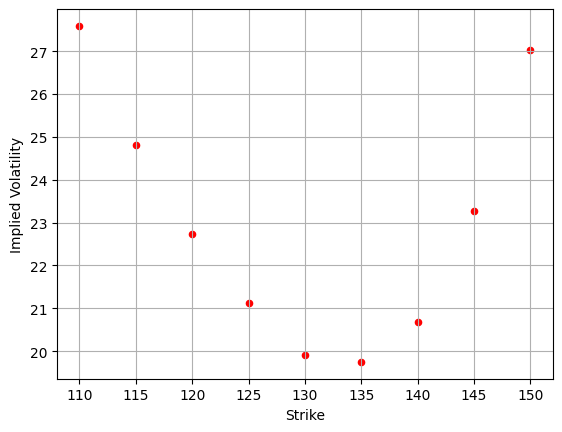

In [ ]:
df_put = putData

df_put["Implied Volatility"] = df_put["Implied Volatility"].str[:-1]
df_put["Implied Volatility"] = df_put["Implied Volatility"].astype(float)
df_put = df_put[df_put["Implied Volatility"] > 0]
df_put["Strike"] = df_put["Strike"].astype(float)
df_put = df_put[df_put["Strike"] > price * 0.8]
df_put = df_put[df_put["Strike"] < price * 1.2]

df_put.plot(kind="scatter", x="Strike", y="Implied Volatility", color="red")
plt.grid()
plt.show()

## Implied Volatility Surface

In [ ]:
from datetime import datetime

In [ ]:
ticker = "IBM"
options_mats = options.get_expiration_dates(ticker)
price = si.get_live_price(ticker)
print(options_mats, price)

temp_data = pd.DataFrame()
callData = pd.DataFrame()

for time in options_mats:
    chain = options.get_options_chain(ticker, time)
    chain_df = chain["calls"]
    date_time_obj = datetime.strptime(time, "%B %d, %Y")
    Td = date_time_obj - datetime.today()

    for row in range(len(chain_df.index)):
        values_to_add = {"Matdays": Td.days, "Maturity": date_time_obj}
        values_to_add_call = {
            "Strike": chain_df["Strike"].loc[row],
            "Implied Vol": chain_df["Implied Volatility"].loc[row],
            "Price": chain_df["Last Price"].loc[row],
        }
        row_to_add = pd.Series(values_to_add)
        row_to_add_call = pd.Series(values_to_add_call)
        temp_data = temp_data.append(row_to_add, ignore_index=True)
        callData = callData.append(row_to_add_call, ignore_index=True)

callData = pd.concat([callData, temp_data], axis=1)
callData.head()

['July 14, 2023', 'July 21, 2023', 'July 28, 2023', 'August 4, 2023', 'August 11, 2023', 'August 18, 2023', 'August 25, 2023', 'September 15, 2023', 'October 20, 2023', 'January 19, 2024', 'June 21, 2024', 'January 17, 2025'] 133.77999877929688


<ipython-input-10-70ab9dfa583d>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append(row_to_add, ignore_index=True)
<ipython-input-10-70ab9dfa583d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  callData = callData.append(row_to_add_call, ignore_index=True)
<ipython-input-10-70ab9dfa583d>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = temp_data.append(row_to_add, ignore_index=True)
<ipython-input-10-70ab9dfa583d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  callData = callData.append(row_to_add_call, ignore_index=True)
<ipython-input-10-70ab9dfa583d>:24: FutureWarning: The frame.append me

,Strike,Implied Vol,Price,Matdays,Maturity
0,105.0,150.78%,28.95,0,2023-07-14
1,123.0,64.26%,12.23,0,2023-07-14
2,124.0,61.91%,6.03,0,2023-07-14
3,125.0,56.64%,8.90,0,2023-07-14
4,126.0,55.37%,8.75,0,2023-07-14


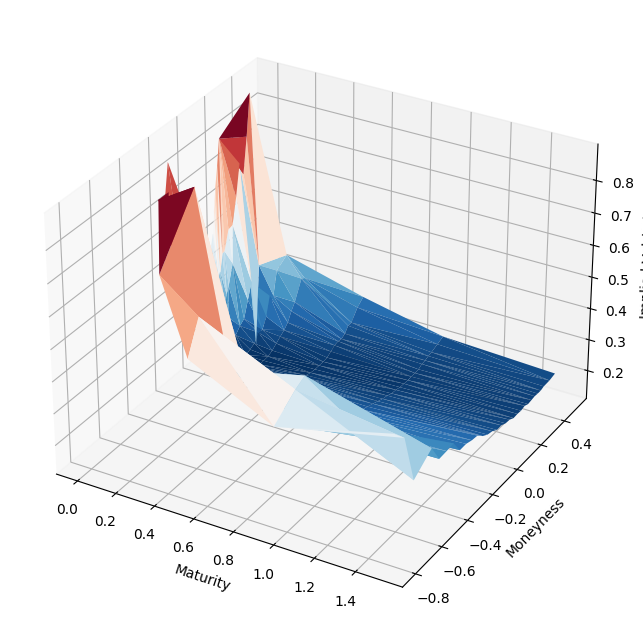

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

callData["Implied Vol"] = callData["Implied Vol"].str[:-1]
callData["ImpliedVol"] = callData["Implied Vol"].astype(float)

callData = callData[callData["ImpliedVol"] < 90]
callData = callData[callData["ImpliedVol"] > 0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_trisurf(
    callData["Matdays"] / 365,
    np.log(callData["Strike"] / price),
    callData["ImpliedVol"] / 100,
    cmap=plt.cm.RdBu_r,
    linewidth=0,
)

# set axis labels
ax.set_xlabel("Maturity")
ax.set_ylabel("Moneyness")
ax.set_zlabel("Implied Vol (%)")

plt.show()

# Merton (1976) Model Calibration

In [ ]:
from scipy.optimize import brute, fmin

In [ ]:
# Market Data from www.eurexchange.com
# as of September 30, 2014

h5 = pd.HDFStore(
    "/content/drive/MyDrive/option_data_M2.h5", "r"
)  # Place this file in the same directory before running the code
data = h5["data"]  # European call & put option data (3 maturities)
h5.close()
S0 = 3225.93  # EURO STOXX 50 level September 30, 2014

In [ ]:
# Option Selection

tol = 0.02  # Tolerance level to select ATM options (percent around ITM/OTM options)
options = data[(np.abs(data["Strike"] - S0) / S0) < tol]
options["Date"] = pd.DatetimeIndex(options["Date"])
options["Maturity"] = pd.DatetimeIndex(options["Maturity"])

In [ ]:
# Adding Time-to-Maturity and constant short-rates

for row, option in options.iterrows():
    T = (option["Maturity"] - option["Date"]).days / 365.0
    options.loc[row, "T"] = T
    options.loc[row, "r"] = 0.005  # ECB base rate

In [ ]:
options.head()

,Date,Strike,Call,Maturity,Put,T,r
38,2014-09-30,3175.0,126.8,2014-12-19,78.8,0.219178,0.005
39,2014-09-30,3200.0,110.9,2014-12-19,87.9,0.219178,0.005
40,2014-09-30,3225.0,96.1,2014-12-19,98.1,0.219178,0.005
41,2014-09-30,3250.0,82.3,2014-12-19,109.3,0.219178,0.005
42,2014-09-30,3275.0,69.6,2014-12-19,121.6,0.219178,0.005


In [ ]:
i = 0
min_RMSE = 100

def M76_error_function(p0):
    """
    Error function for parameter calibration in Merton'76 model
    ---------------
    Parameters to calibrate:
    sigma: float
          volatility factor in diffusion term
    lambda: float
          jump intensity
    mu: float
          expected jump size
    delta: float
          standard deviation of jump
    ----------------
    RMSE: Root Mean Squared Error
    """
    global i, min_RMSE
    sigma, lamb, mu, delta = p0

    if sigma < 0.0 or delta < 0.0 or lamb < 0.0:
        return 500.0
    se = []

    for row, option in options.iterrows():
        model_value = M76_call_value(
            S0, option["Strike"], option["T"], option["r"], sigma, lamb, mu, delta
        )
        se.append((model_value - option["Call"]) ** 2)

    RMSE = np.sqrt(sum(se) / len(se))
    min_RMSE = min(min_RMSE, RMSE)
    if i % 50 == 0:
        print("%4d |" % i, np.array(p0), "| %7.3f | %7.3f" % (RMSE, min_RMSE))
    i += 1
    return RMSE

In [ ]:
def M76_calibration_full():
    """
    Calibrates Merton (1976) stochastic volatility model to market quotes
    """
    # First run with brute force
    # (scan sensible regions, for faster convergence)
    p0 = brute(
        M76_error_function,
        (
            (0.075, 0.201, 0.025),  # sigma
            (0.10, 0.401, 0.1),  # lambda
            (-0.5, 0.01, 0.1),  # mu
            (0.10, 0.301, 0.1),
        ),  # delta
        finish=None,
    )

    # Second run with local, convex minimization
    # (we dig deeper where promising results)
    opt = fmin(
        M76_error_function, p0, xtol=0.0001, ftol=0.0001, maxiter=550, maxfun=1050
    )
    return opt

In [ ]:
opt = M76_calibration_full()

   0 | [ 0.075  0.1   -0.5    0.1  ] | 105.801 | 100.000
  50 | [ 0.075  0.3   -0.1    0.3  ] | 105.801 | 100.000
 100 | [ 0.1  0.2 -0.2  0.2] | 105.802 | 100.000
 150 | [ 0.125  0.1   -0.3    0.1  ] | 105.802 | 100.000
 200 | [ 0.125  0.4   -0.5    0.3  ] | 105.803 | 100.000
 250 | [0.15 0.2  0.   0.2 ] | 105.802 | 100.000
 300 | [ 0.175  0.1   -0.1    0.1  ] | 105.803 | 100.000
 350 | [ 0.175  0.4   -0.3    0.3  ] | 105.803 | 100.000
 400 | [ 0.2  0.3 -0.4  0.2] | 105.803 | 100.000
 450 | [0.02215759 0.46513306 0.00108846 0.38387421] | 105.793 | 100.000
 500 | [0.00259966 0.09802736 0.00317631 0.70059498] | 105.789 | 100.000
 550 | [ 0.01383945  0.31947624 -0.01070704  2.7896333 ] |  32.688 |  32.166
 600 | [ 0.01480014  0.31268315 -0.01119705  2.8788598 ] |  32.046 |  32.046
 650 | [ 0.00831299  0.50698393 -0.01159151  2.73397937] |  32.032 |  32.030
 700 | [ 1.32484427e-04  7.75765484e-01 -1.25477553e-02  2.60041328e+00] |  32.008 |  32.007
 750 | [ 2.22366244e-05  8.25838698e-01 -

<ipython-input-19-16587b0a3202>:20: RuntimeWarning: Maximum number of iterations has been exceeded.
  opt = fmin(


In [ ]:
def generate_plot(opt, options):
    # First, we calculate model prices
    sigma, lamb, mu, delta = opt
    options["Model"] = 0.0
    for row, option in options.iterrows():
        options.loc[row, "Model"] = M76_call_value(
            S0, option["Strike"], option["T"], option["r"], sigma, lamb, mu, delta
        )

    # Second, we plot
    mats = sorted(set(options["Maturity"]))
    options = options.set_index("Strike")
    for i, mat in enumerate(mats):
        options[options["Maturity"] == mat][["Call", "Model"]].plot(
            style=["b-", "ro"], title="%s" % str(mat)[:10]
        )
        plt.ylabel("Option Value")

In [ ]:
generate_plot(opt, options)